# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [5]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [6]:
# Read and select variables
df_orig = pd.read_csv("supermarkets_data_enriched.csv")[['type',
                                                       'id',
                                                        'lat',
                                                        'lon',
                                                        'brand',
                                                        'shop',
                                                        'addr:city', 
                                                        'addr:housenumber', 
                                                        'addr:postcode', 
                                                        'geometry', 
                                                        'index_right',
                                                        'bfs_name',
                                                        'bfs_number',
                                                        'pop',
                                                        'pop_dens',
                                                        'frg_pct',
                                                        'emp']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)


,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
6,node,7389830915,47.225056,8.970650,Denner,supermarket,Uznach,15,8730.0,POINT (8.9706499 47.2250563),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
7,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,1,8001.0,POINT (8.5421608 47.3767316),77,Zürich,261,420217,4778.994655,32.458468,491193.0


Count the number of supermarkets per brand (e.g. Migros, Coop, etc)

In [8]:
supermarkets_per_brand= df_orig.groupby('brand').size().reset_index(name='count')
print(supermarkets_per_brand)

                                    brand  count
0                                    ALDI     39
1                                    Aldi     25
2                                Alnatura     11
3                                    Coop    174
4                                  Denner    142
5                                  Globus      2
6                                   Jumbo      1
7                                   Landi     15
8                                    Lidl     25
9                            Lidl Schweiz      1
10                                 Migros    335
11                          Migros-Outlet     11
12  Rolog Krinner Cotub Titan Serac Molok      1
13                                   Spar     19
14                                    VOI      4
15                     VOI Migros Partner     43
16                                   Volg     68
17                                 ZWIBOL      1


Barchart: Number of Supermarkets per brands

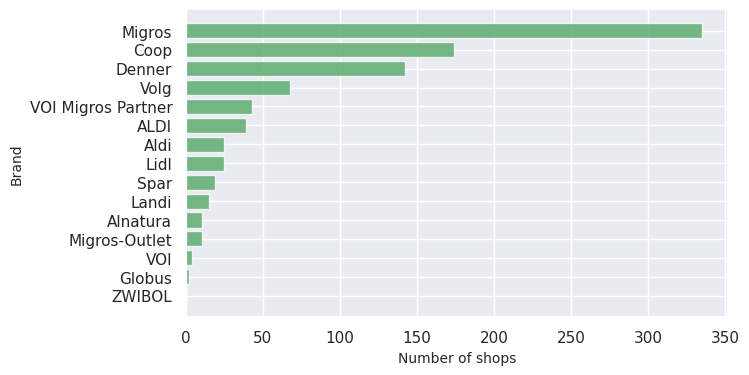

In [9]:
df_bar = df_orig['brand'].value_counts().nlargest(15).sort_values(ascending=True)
# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

# Group data by rooms (only the topmost 15 values are shown)
df_bar = df_orig['brand'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of shops', fontsize=10)
ax.set_ylabel('Brand', fontsize=10)

# Show graph
plt.show()

Scatterplotmatrix with pair grid

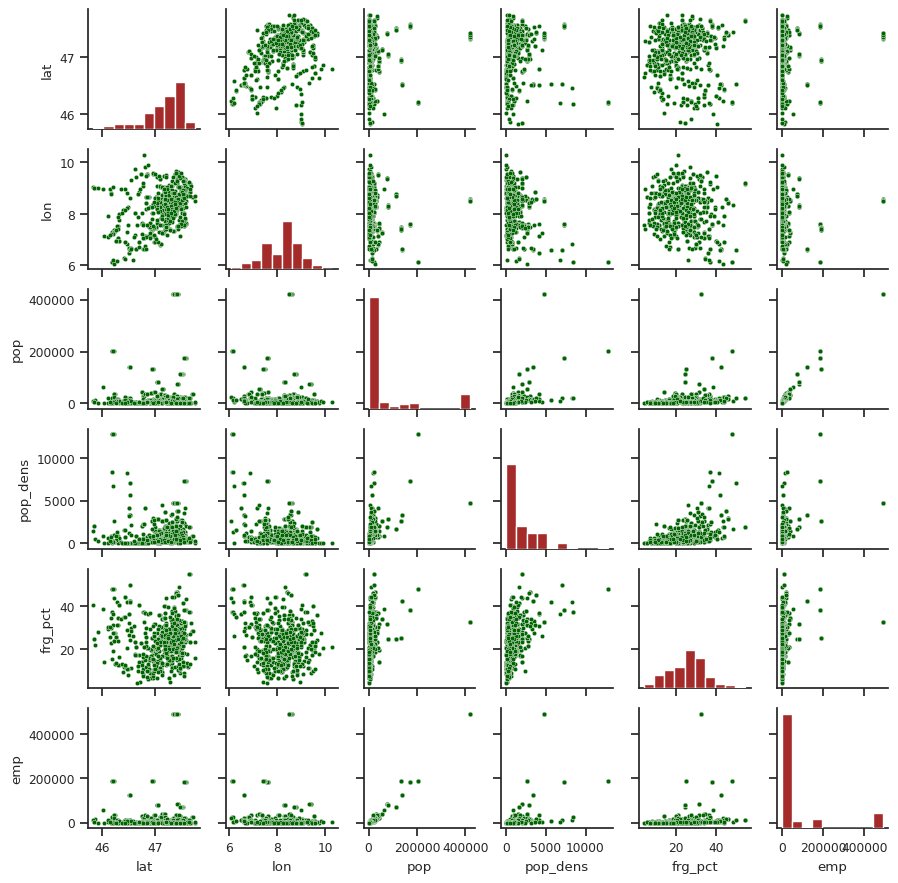

In [10]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df_orig[['brand', 
                     'lat', 
                     'lon', 
                     'pop',
                     'pop_dens',
                     'frg_pct',
                     'emp']],
                 height=1.5, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')


Plot with locations of supermarkets

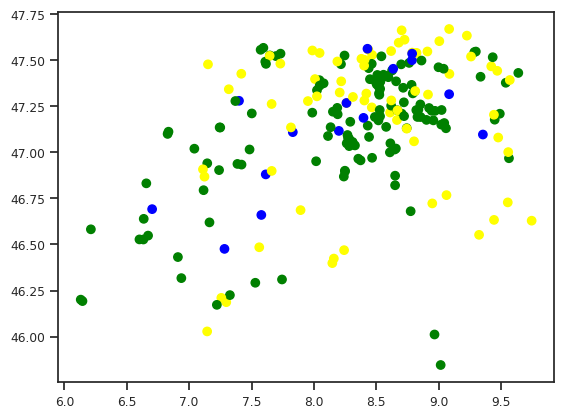

In [11]:
#Subset:
df_sub = df_orig.loc[df_orig['brand'].isin(['Denner', 'Volg', 'Landi'])]
df_sub

#Colors
colors = {'Denner': 'green', 'Volg': 'yellow', 'Landi': 'blue'}

#Plot
plt.scatter(df_sub['lon'],
            df_sub['lat'],
            c=df_sub['brand'].map(colors))
